In [1]:
import pandas as pd 
import seaborn as sns
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [3]:
cols = ['How many days of the week did you go outside on average? (During the 1A term)',
       'Rate your mental health before the term',
       'Rate your mental health during the term.',
       'Rate your mental health now']
df = class_df[cols].rename(columns={'How many days of the week did you go outside on average? (During the 1A term)': 'outside',
                                   'Rate your mental health before the term': 'MH Before',
                                   'Rate your mental health during the term.': 'MH During',
                                   'Rate your mental health now': 'MH Now'}).dropna()
df.head()

outside  MH Before  MH During  MH Now
0      1.0        7.0        4.0     7.0
1      0.0        6.0        4.0     6.0
2      3.0        8.0        7.0     8.0
3      3.0        7.0        9.0     8.0
4      7.0        8.0        4.0     6.0

In [4]:
len(df['MH During'])

94

Text(0.5, 1.0, 'Mental Health During Term vs Days Outside')

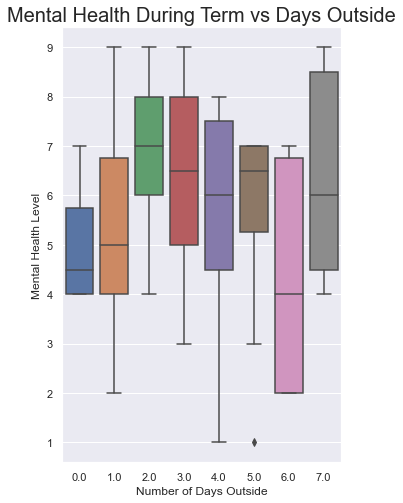

In [6]:
# graph outside vs mental health during the term in a boxplot
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (5, 8)})
ax2 = sns.boxplot(x='outside', y='MH During', data=df)
ax2.set_xlabel('Number of Days Outside')
ax2.set_ylabel('Mental Health Level')
ax2.set_title('Mental Health During Term vs Days Outside', fontsize=20)

In [ ]:
df = df.reset_index()
df

In [11]:
ax2.figure.savefig('graphs/term_mh_v_days_outside.png')

In [12]:
# graph outside vs mental health during the term in a regplot
# ax3 = sns.regplot(x='outside', y='MH During', data=df)
# ax3.set_xlabel('Number of Days Outside')
# ax3.set_ylabel('Mental Health Level')

In [ ]:
# get the difference between pre and post and plot that against days outside
def get_mh_diff(row):
    row['diff1'] = row['MH During'] - row['MH Before'] 
    return row

df = df.apply(get_mh_diff, axis=1)
df.head()

Text(0.5, 1.0, 'Mental Health Change vs Days Outside')

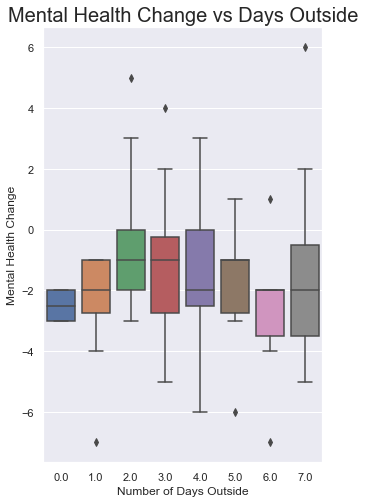

In [14]:
# graph outside vs change in mental health in a boxplot
sns.set(rc={'figure.figsize': (5, 8)})
ax4 = sns.boxplot(x='outside', y='diff1', data=df)
ax4.set_xlabel('Number of Days Outside')
ax4.set_ylabel('Mental Health Change')
ax4.set_title('Mental Health Change vs Days Outside', fontsize=20)

In [15]:
ax4.figure.savefig('graphs/mh_change_v_days_outside.png')